### Practice

Doing some basic practice for classification models in Pytorch

In [401]:
import torch
from sklearn.datasets import make_moons

In [402]:
# Making the data
n_samples = 1000

# Making moons
X, y = make_moons(n_samples=n_samples,
                  noise=0.03,
                  random_state=42)
# Viewing the shape
X.shape, y.shape

((1000, 2), (1000,))

In [403]:
len(X), len(y)

(1000, 1000)

In [404]:
# Printing out the first few samples for X and y
print(f"First five samples of X:{X[:5]}\n")
print(f"First five samples of y:{y[:5]}\n")

First five samples of X:[[-0.00933187  0.39098105]
 [ 0.95457387 -0.47375583]
 [ 0.9185256  -0.42519648]
 [ 0.41276802 -0.37638459]
 [-0.84532016  0.52879908]]

First five samples of y:[1 1 1 1 0]



In [405]:
# Displaying the data as a scatter plot

# First we will make a data frame
import pandas as pd

df = pd.DataFrame({"X1": X[:, 0],
      "X2": X[:, 1],
      "y":y})
# Displaying the dataFrame
df

,X1,X2,y
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


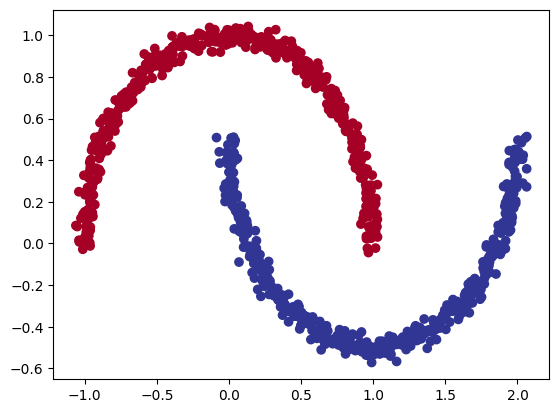

In [406]:
# Making the scatter plot
import matplotlib.pyplot as plt
plt.scatter(x=df["X1"],
            y=df["X2"],
            c=y,
            cmap=plt.cm.RdYlBu)

plt.show()

In [407]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample}, and y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape}, and y: {y_sample.shape})")

Values for one sample of X: [-0.00933187  0.39098105], and y: 1
Shapes for one sample of X: (2,), and y: ())


### Converting the Data into Tensors

In [408]:
# Getting the data from numpy and converting them to Tensor with dtype tensor.float32
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [409]:
X.device, y.device

(device(type='cpu'), device(type='cpu'))

In [410]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [411]:
X[:5], y[:5]

(tensor([[-0.0093,  0.3910],
         [ 0.9546, -0.4738],
         [ 0.9185, -0.4252],
         [ 0.4128, -0.3764],
         [-0.8453,  0.5288]]),
 tensor([1., 1., 1., 1., 0.]))

### Performing the Train-Test Split

In [412]:
# Importing the train-test split
from sklearn.model_selection import train_test_split

# Creating the training and test sets
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.2, # 80% training and 20% test data
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### Device Agnostic Code

In [413]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Building the Model

Here we will build two models one linear and the other one a non-linear model and see how well both those models do on this data

In [414]:
from torch import nn

In [415]:
# Linear model with no non-linearity
class MoonModelV0(nn.Module):
    def __init__(self, input_features, hidden_units, output_features):
        super().__init__()

        # Creating the layers
        self.model_layers = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.model_layers(x)
    
model_0 = MoonModelV0(input_features=2, hidden_units=10, output_features=1).to(device)
model_0

MoonModelV0(
  (model_layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [416]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [417]:
# Non-Linear Model with ReLU activation
class MoonModelV1(nn.Module):
    def __init__(self, input_features, hidden_units, output_features):
        super().__init__()

        # Creating the layers
        self.model_layers = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.model_layers(x)

model_1 = MoonModelV1(input_features=2, hidden_units=10, output_features=1).to(device)
model_1

MoonModelV1(
  (model_layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [418]:
next(model_1.parameters()).device

device(type='cuda', index=0)

### Loss function and Optimizer

In [419]:
# Setting the Binary Cross Entropy loss
loss_fn = nn.BCEWithLogitsLoss()

# Setting the SGD activation function
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.0015)

optimizer_1 = torch.optim.Adam(params=model_1.parameters(),
                            lr=0.0015)

### Training and testing loops

Now that our models have been trained, its time to write training and testing loops

In [420]:
from torchmetrics.classification import BinaryAccuracy
Accuracy = BinaryAccuracy().to(device)

In [421]:
# Setting the manual seeds to induce reproducibility in our outputs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Defining the number of epochs
Epochs = 600

# Putting the input tensors on device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(1,Epochs+1):
    ### Training loop
    model_0.train()
    model_1.train()

    # Forward Pass
    # model_0.forward
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    # model_1.forward
    y_logits_1 = model_1(X_train).squeeze()
    y_pred_1 = torch.round(torch.sigmoid(y_logits_1))


    # Calculate the loss
    # model_0.loss
    loss = loss_fn(y_logits, y_train)
    acc = Accuracy(y_pred, y_train)*100
    # model_1.loss
    loss_1 = loss_fn(y_logits_1, y_train)
    acc_1 = Accuracy(y_pred_1, y_train)*100

    # Optimizers Zero Grad
    optimizer.zero_grad()
    optimizer_1.zero_grad()

    # Losses Backwards
    loss.backward()
    loss_1.backward()

    # Optimizers Step
    optimizer.step()
    optimizer_1.step()

    ### Testing Loop
    model_0.eval()
    model_1.eval()

    with torch.inference_mode():
        # 1. Forward pass
        # model_0
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # model_1
        test_logits_1 = model_1(X_test).squeeze()
        test_pred_1 = torch.round(torch.sigmoid(test_logits_1))

        # 2. Calculate the loss
        # model_0
        test_loss = loss_fn(test_logits,y_test)
        test_acc = Accuracy(test_pred, y_test)*100
        # model_1
        test_loss_1 = loss_fn(test_logits_1,y_test)
        test_acc_1 = Accuracy(test_pred_1, y_test)*100
        
    # Print out whats happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}") 
        print(f"Model_0 Loss: {loss:.5f}, Model_1 Loss: {loss_1:.5f}, Model_0 Accuracy: {acc:.2f}%, Model_1 Accuracy: {acc_1:.2f}%") 
        print(f"Model_0 Test Loss: {test_loss:.5f}, Model_1 Test Loss: {test_loss_1:.5f} | Model_0 Test Accuracy: {test_acc:.2f}%, Model_1 Test Accuracy: {test_acc_1:.2f}%\n\n")
        

Epoch: 100
Model_0 Loss: 0.35376, Model_1 Loss: 0.54815, Model_0 Accuracy: 81.25%, Model_1 Accuracy: 84.75%
Model_0 Test Loss: 0.37911, Model_1 Test Loss: 0.55868 | Model_0 Test Accuracy: 77.50%, Model_1 Test Accuracy: 80.50%


Epoch: 200
Model_0 Loss: 0.25828, Model_1 Loss: 0.30727, Model_0 Accuracy: 87.25%, Model_1 Accuracy: 88.75%
Model_0 Test Loss: 0.26685, Model_1 Test Loss: 0.30985 | Model_0 Test Accuracy: 88.00%, Model_1 Test Accuracy: 90.00%


Epoch: 300
Model_0 Loss: 0.24051, Model_1 Loss: 0.15773, Model_0 Accuracy: 88.88%, Model_1 Accuracy: 94.12%
Model_0 Test Loss: 0.24068, Model_1 Test Loss: 0.15763 | Model_0 Test Accuracy: 89.50%, Model_1 Test Accuracy: 94.50%


Epoch: 400
Model_0 Loss: 0.23943, Model_1 Loss: 0.07210, Model_0 Accuracy: 88.88%, Model_1 Accuracy: 98.75%
Model_0 Test Loss: 0.23753, Model_1 Test Loss: 0.07195 | Model_0 Test Accuracy: 89.50%, Model_1 Test Accuracy: 99.00%


Epoch: 500
Model_0 Loss: 0.23940, Model_1 Loss: 0.03343, Model_0 Accuracy: 88.88%, Model

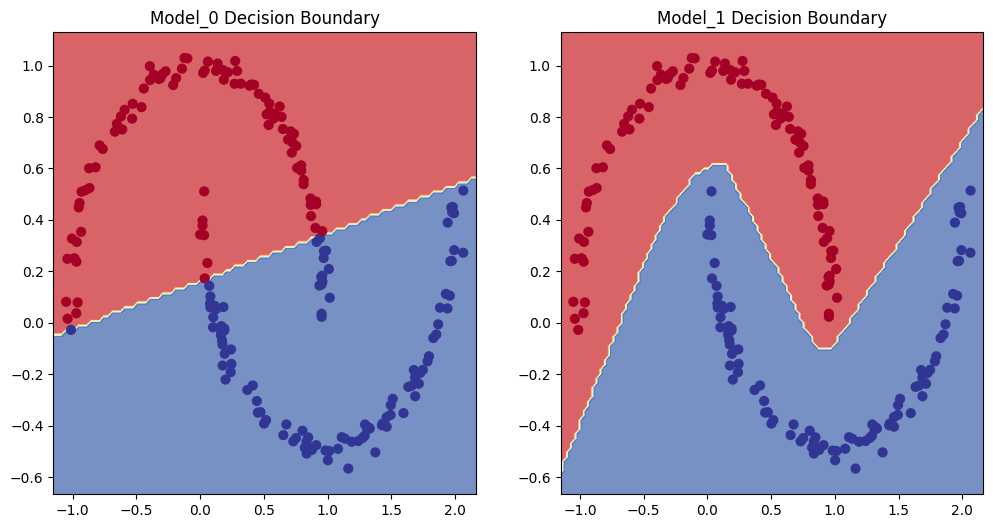

In [422]:
from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Model_0 Decision Boundary")
plot_decision_boundary(model_0, X_test, test_pred)
plt.subplot(1, 2, 2)
plt.title("Model_1 Decision Boundary")
plot_decision_boundary(model_1, X_test, test_pred_1)

### Multiclass Classification

In [141]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import seaborn as sns


#### Dataset

We'll use the code below the dataset

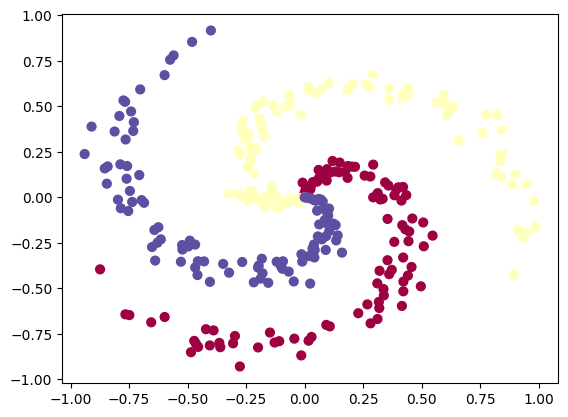

In [142]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [143]:
X.shape, y.shape

((300, 2), (300,))

In [144]:
X[:5], y[:5]

(array([[-0.        ,  0.        ],
        [-0.00268427,  0.00973782],
        [-0.00138158,  0.02015472],
        [ 0.01046224,  0.02843968],
        [ 0.0034037 ,  0.04026042]]),
 array([0, 0, 0, 0, 0], dtype=uint8))

### Converting the data into torch tensor

In [145]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

X.shape, y.shape, X.dtype, y.dtype

(torch.Size([300, 2]), torch.Size([300]), torch.float32, torch.int64)

In [146]:
X[:5], y[:5]

(tensor([[-0.0000,  0.0000],
         [-0.0027,  0.0097],
         [-0.0014,  0.0202],
         [ 0.0105,  0.0284],
         [ 0.0034,  0.0403]]),
 tensor([0, 0, 0, 0, 0]))

In [147]:
y.unique()

tensor([0, 1, 2])

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

len(X_train), len(X_test), len(y_train), len(y_test) 

(240, 60, 240, 60)

In [149]:
X_train.shape

torch.Size([240, 2])

In [150]:
y_test

tensor([2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 2,
        1, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2,
        1, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0])

In [151]:
# Writing the device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [152]:
class SpiralModelV0(nn.Module):
    def __init__(self, input_features, hidden_features, output_features):
        super().__init__()

        # Creating the model layers
        self.model_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_features),
            nn.ReLU(),
            nn.Linear(in_features=hidden_features, out_features=hidden_features),
            nn.ReLU(),
            nn.Linear(in_features=hidden_features, out_features=hidden_features),
            nn.ReLU(),
            nn.Linear(in_features=hidden_features, out_features=output_features),
        )
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.model_layer_stack(x)
    

model_2 = SpiralModelV0(
    input_features=2,
    hidden_features=20,
    output_features=3
)
model_2.to(device)

model_2

SpiralModelV0(
  (model_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=3, bias=True)
  )
)

In [153]:
next(model_2.parameters()).device

device(type='cuda', index=0)

In [154]:
model_2.state_dict()

OrderedDict([('model_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007],
                      [ 0.5459,  0.1177],
                      [-0.2296,  0.4370],
                      [ 0.1102,  0.5713],
                      [ 0.0773, -0.2230]], device='cuda:0')),
             ('model_layer_stack.0.bias',
              tensor([ 0.1900, -0.1918,  0.2976,  0.63

In [155]:
model_2.to(device)

SpiralModelV0(
  (model_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=3, bias=True)
  )
)

In [156]:
next(model_2.parameters()).device

device(type='cuda', index=0)

### Defining the Loss Function and the Optimizer

In [157]:
# Defining the Loss Function (Cross Entropy for Muli-Class Classification)
loss_fn = nn.CrossEntropyLoss()

# Defining the optimizer
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.0005)

In [158]:
from torchmetrics import Accuracy

accuracy = Accuracy(task='multiclass', num_classes=3).to(device)

In [159]:
model_2.state_dict()

OrderedDict([('model_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007],
                      [ 0.5459,  0.1177],
                      [-0.2296,  0.4370],
                      [ 0.1102,  0.5713],
                      [ 0.0773, -0.2230]], device='cuda:0')),
             ('model_layer_stack.0.bias',
              tensor([ 0.1900, -0.1918,  0.2976,  0.63

### Training and Test Loops

In [160]:
X_train.shape

torch.Size([240, 2])

In [161]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2.to(device)
# Putting the input tensors on device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 2800
# Training Loop
for epoch in range(epochs):
    # Put model_2 in training mode
    model_2.train()

    # Forward Pass
    y_logits = model_2(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # Loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy(y_pred, y_train)*100

    # Optimizer Zero Grad
    optimizer.zero_grad

    # Loss Backward
    loss.backward()

    # Optimizer Step
    optimizer.step()

    ### Testing Loop
    model_2.eval()
    with torch.inference_mode():

        test_logits = model_2(X_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy(test_pred, y_test)*100

        if epoch % 200 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.4f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")



Epoch: 0 | Loss: 1.0960, Accuracy: 35.00% | Test Loss: 1.1061, Test Accuracy: 26.67%


Epoch: 200 | Loss: 0.6908, Accuracy: 67.92% | Test Loss: 0.7382, Test Accuracy: 61.67%
Epoch: 400 | Loss: 1.5346, Accuracy: 59.58% | Test Loss: 1.3599, Test Accuracy: 68.33%
Epoch: 600 | Loss: 0.9544, Accuracy: 47.92% | Test Loss: 0.8893, Test Accuracy: 50.00%
Epoch: 800 | Loss: 0.9526, Accuracy: 59.58% | Test Loss: 1.0772, Test Accuracy: 61.67%
Epoch: 1000 | Loss: 0.7237, Accuracy: 61.67% | Test Loss: 0.7527, Test Accuracy: 60.00%
Epoch: 1200 | Loss: 0.5738, Accuracy: 69.58% | Test Loss: 0.5731, Test Accuracy: 61.67%
Epoch: 1400 | Loss: 0.4597, Accuracy: 82.50% | Test Loss: 0.4501, Test Accuracy: 81.67%
Epoch: 1600 | Loss: 0.3517, Accuracy: 87.92% | Test Loss: 0.3017, Test Accuracy: 85.00%
Epoch: 1800 | Loss: 0.2415, Accuracy: 90.00% | Test Loss: 0.2401, Test Accuracy: 88.33%
Epoch: 2000 | Loss: 0.1859, Accuracy: 92.92% | Test Loss: 0.1592, Test Accuracy: 93.33%
Epoch: 2200 | Loss: 0.1594, Accuracy: 92.50% | Test Loss: 0.1382, Test Accuracy: 93.33%
Epoch: 2400 | Loss: 0.1601, Accuracy

In [162]:
print(f"Epoch: {epoch} | Loss: {loss:.4f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 2799 | Loss: 0.0677, Accuracy: 96.67% | Test Loss: 0.0637, Test Accuracy: 96.67%


In [163]:
X_test.device

device(type='cuda', index=0)

In [164]:
next(model_2.parameters()).device

device(type='cuda', index=0)

In [165]:
model_2.to(device)

SpiralModelV0(
  (model_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=3, bias=True)
  )
)

In [166]:
# Make Predictions
model_2.eval()
with torch.inference_mode():
    y_logits = model_2(X_test.to(device))

y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 2,
        0, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2,
        1, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0], device='cuda:0')

In [167]:
test_pred.shape, X_test.shape

(torch.Size([60]), torch.Size([60, 2]))

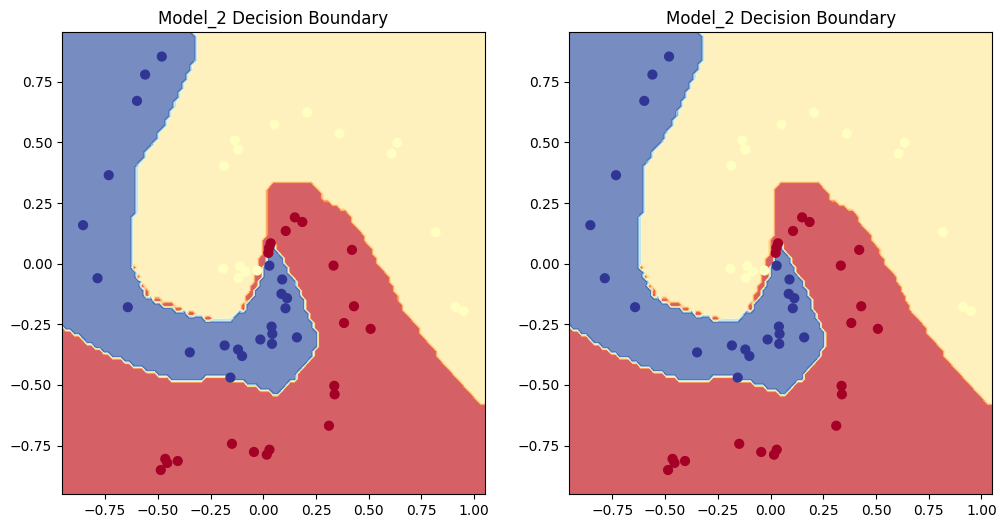

In [168]:
from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Model_2 Decision Boundary")
plot_decision_boundary(model_2, X_test, y_test)
plt.subplot(1, 2, 2)
plt.title("Model_2 Decision Boundary")
plot_decision_boundary(model_2, X_test, y_test)

In [169]:
def tanh(x: torch.Tensor)-> torch.Tensor:
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))
# (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

In [170]:
# Create a tensor
# A = torch.arange(-10, 10, 1, dtype=torch.float32)
A = torch.arange(-10, 10, 1.0)
A.dtype

torch.float32

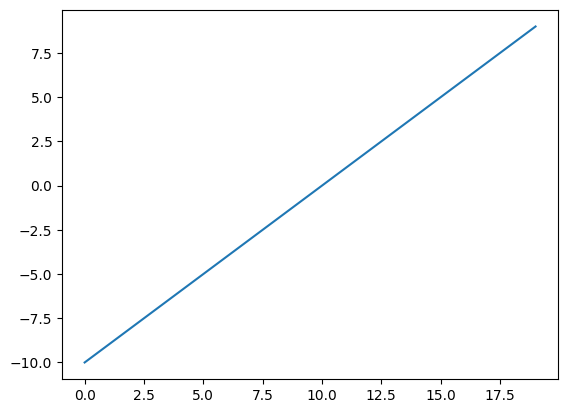

In [171]:
plt.plot(A)

In [172]:
tanh(A)

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9993, -0.9951,
        -0.9640, -0.7616,  0.0000,  0.7616,  0.9640,  0.9951,  0.9993,  0.9999,
         1.0000,  1.0000,  1.0000,  1.0000])

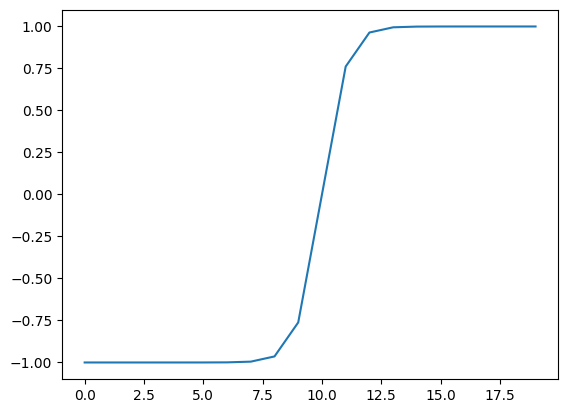

In [173]:
plt.plot(tanh(A))